In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlite3 import connect
import datetime

In [2]:
def df_stats(df):
    print('shape', df.shape)
    return df.head()

In [7]:
def sql_select(conn, cols, table:str ):

    query = pd.read_sql(
        f"SELECT {cols} FROM {table}",
        conn
    )
    return query

In [8]:
# connecting to db
conn = connect('C:\Data Analysis\CounterStrike-GO\sql_gc-main\data\gc.db')

In [9]:
# show tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables

,name
0,tb_players
1,tb_lobby_stats_player
2,tb_medalha
3,tb_players_medalha


In [10]:
# show tb_players
players = sql_select(conn, cols='*', table='tb_players')
# players['dtBirth'] = pd.DatetimeIndex(players['dtBirth']).year
    
df_stats(players)

shape (2716, 7)


,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,None,2021-03-19 21:31:39
1,2,0,0,0,br,None,2020-05-06 19:28:29
2,3,0,0,0,br,None,2020-01-28 13:00:38
3,4,0,0,0,br,None,2017-05-31 16:13:51
4,5,0,0,0,ar,None,2021-02-08 11:57:21


In [11]:
pd.read_sql(
    f"""SELECT {'idPlayer, dtBirth'}
        FROM tb_players
        WHERE {'dtBirth'} IS NOT NULL
    """,
    conn,
    parse_dates='dtBirth')

,idPlayer,dtBirth
0,6,2002-03-23
1,9,2000-05-03
2,10,2005-04-15
3,11,1994-10-28
4,13,2000-05-01
...,...,...
2003,2711,1991-07-04
2004,2712,2000-03-03
2005,2714,2000-06-23
2006,2715,2001-02-21


In [15]:
year_birth_br = pd.read_sql(
    f"""SELECT {"idPlayer, strftime('%Y', dtBirth) as year_birth_br"}
        FROM tb_players
        WHERE {'dtBirth'} IS NOT NULL and descCountry='br'
    """,
    conn,
    parse_dates='dtBirth')

year_birth_world = pd.read_sql(
    f"""SELECT {"idPlayer, strftime('%Y', dtBirth) as year_birth_world"}
        FROM tb_players
        WHERE {'dtBirth'} IS NOT NULL
    """,
    conn,
    parse_dates='dtBirth')

Ano de nascimento dos jogadores brasileiros

ValueError: Could not interpret input 'year_birth'

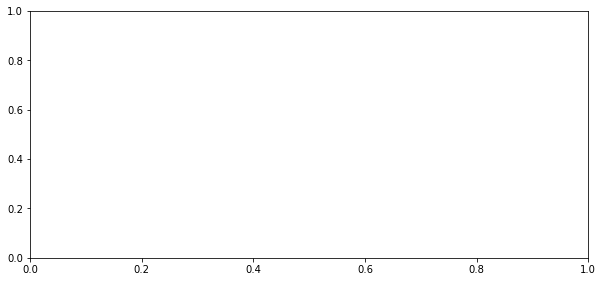

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.countplot(data=year_birth_br, x='year_birth');
plt.xticks(rotation=90);

plt.subplot(2,1,2)
sns.countplot(data=year_birth_world, x='year_birth');
plt.xticks(rotation=90);